In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
bank =  pd.read_csv('bank.csv', sep=';')

In [40]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [41]:
newbank = bank.copy()

# GET A TEST SET

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(newbank, newbank['y']):
    train = newbank.loc[train_index]
    test = newbank.loc[test_index]



In [45]:
bank = train.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F954A8438>,
      dtype=object)

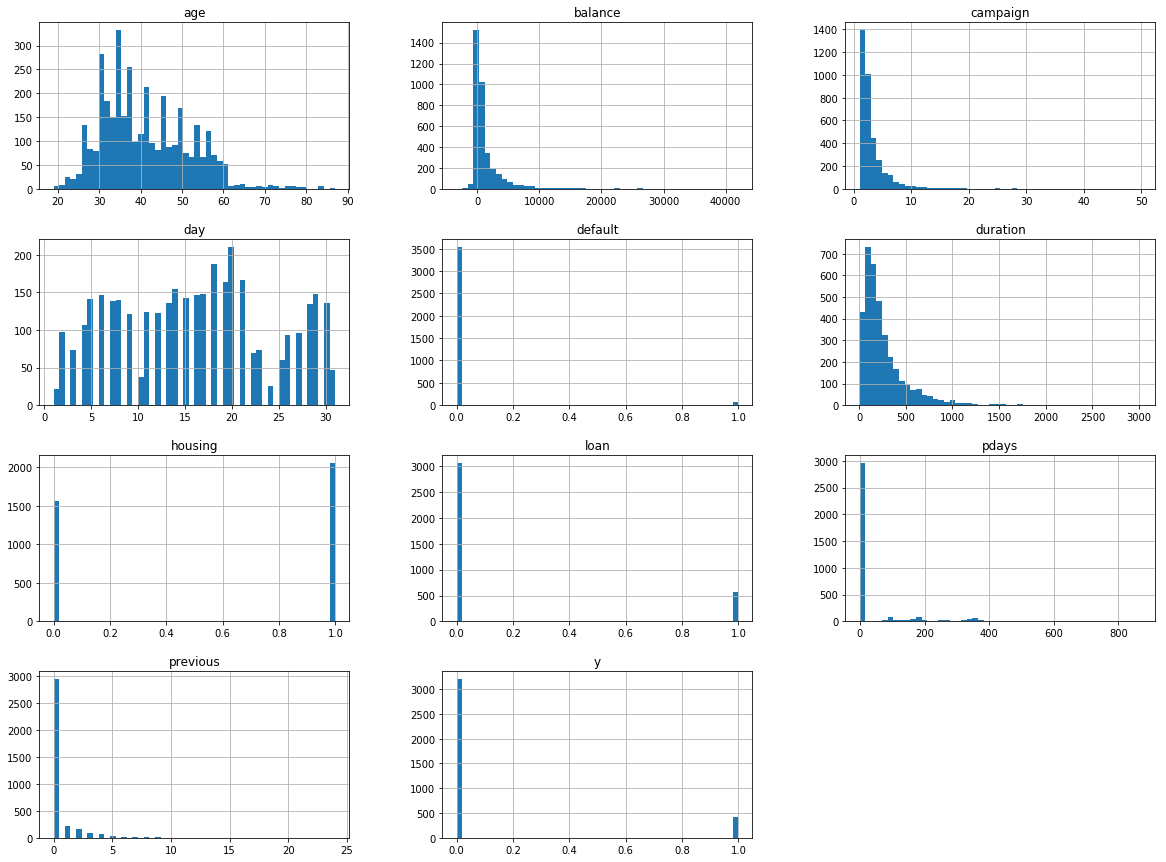

In [9]:
bank.hist(figsize=(20,15), bins=50)

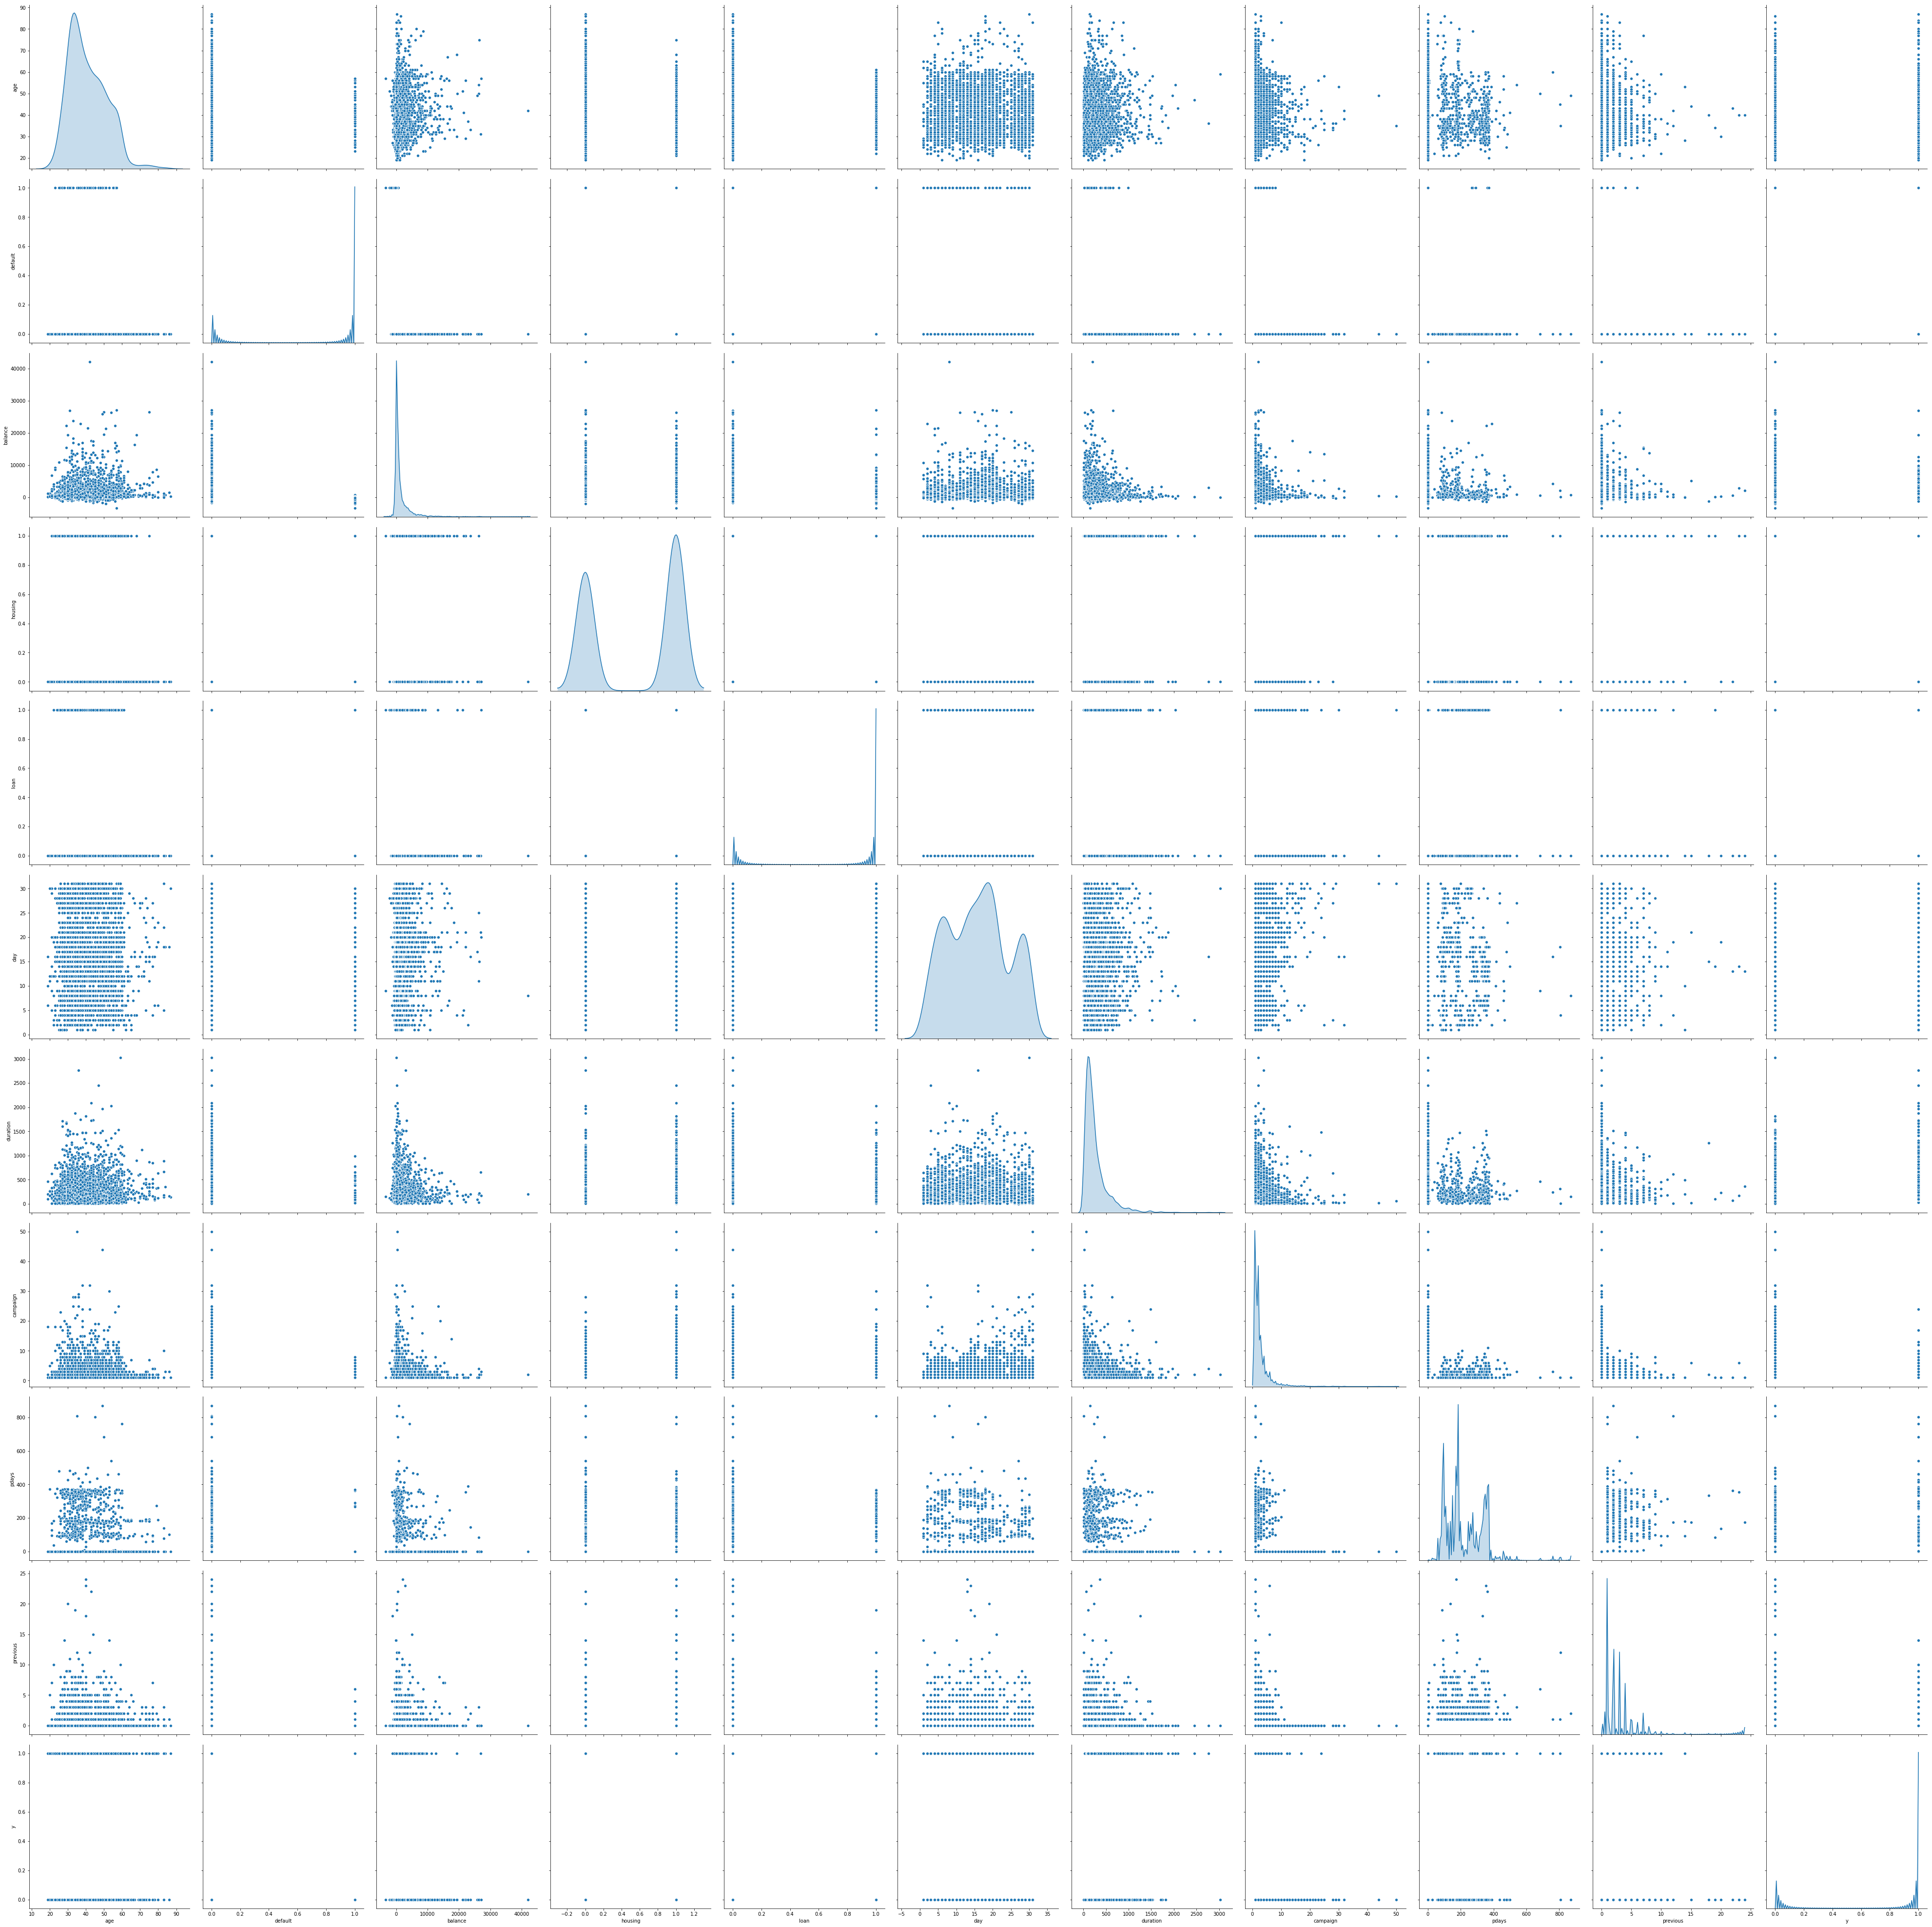

In [10]:
sns.pairplot(bank, diag_kind='kde', height=5)

In [11]:
sns.pairplot(bank, height=10)

In [12]:
# scatterplot is the same as pairplot

# HOUSING

In [13]:
pd.crosstab([bank["housing"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
housing,,,
0,1318,243,1561
1,1881,174,2055
All,3199,417,3616


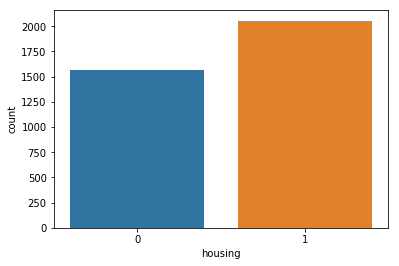

In [14]:
sns.countplot(bank['housing'])

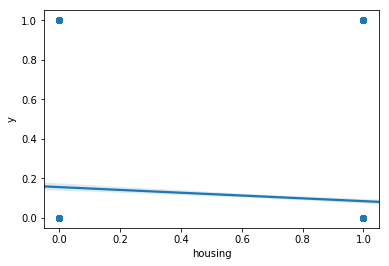

In [15]:
sns.regplot('housing', 'y', data=bank)

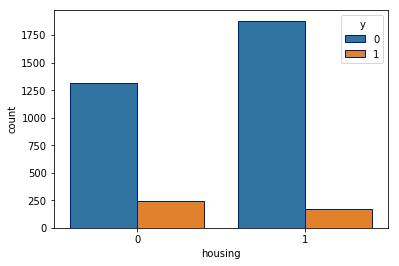

In [16]:
sns.countplot("housing", hue = "y", data = bank, edgecolor=sns.color_palette("dark", 1))

In [17]:
bank.corr()['housing']

age        -0.191584
default     0.007292
balance    -0.050744
housing     1.000000
loan        0.015932
day        -0.022393
duration    0.014269
campaign    0.013059
pdays       0.111147
previous    0.030380
y          -0.110098
Name: housing, dtype: float64

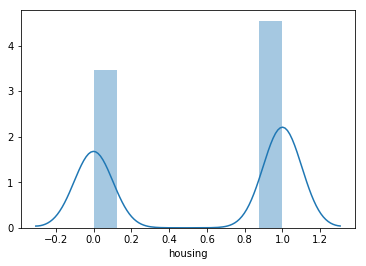

In [18]:
sns.distplot(bank['housing'])

# LOAN

In [19]:
pd.crosstab([bank["loan"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
loan,,,
0,2674,383,3057
1,525,34,559
All,3199,417,3616


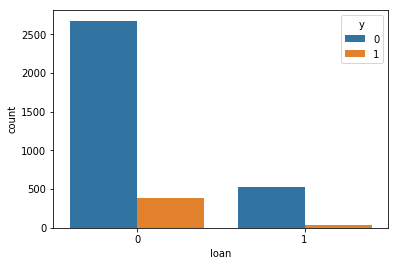

In [20]:
sns.countplot('loan', hue='y', data=bank)

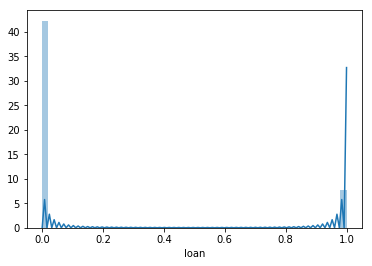

In [21]:
sns.distplot(bank['loan'])

In [22]:
bank.corr()['loan']

age        -0.008377
default     0.080143
balance    -0.071942
housing     0.015932
loan        1.000000
day        -0.005955
duration   -0.011382
campaign    0.030993
pdays      -0.031049
previous   -0.012078
y          -0.072961
Name: loan, dtype: float64

In [23]:
# it has a correlation of -0.07 with target...
# *** shaky

# DEFAULT

In [24]:
pd.crosstab([bank["default"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
default,,,
0,3138,409,3547
1,61,8,69
All,3199,417,3616


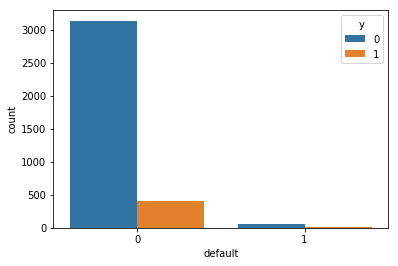

In [25]:
sns.countplot('default', hue='y', data=bank)

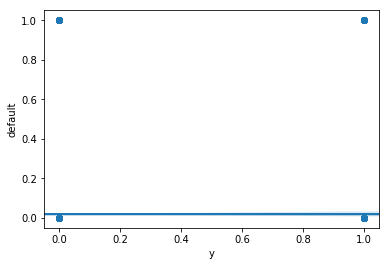

In [26]:
sns.regplot('y', 'default', data=bank)

In [27]:
bank.corr()['default']

age        -0.009473
default     1.000000
balance    -0.081091
housing     0.007292
loan        0.080143
day        -0.019910
duration   -0.015954
campaign   -0.009565
pdays      -0.025774
previous   -0.027652
y           0.000271
Name: default, dtype: float64

In [28]:
# shaky... 
# advise to drop

# AGE

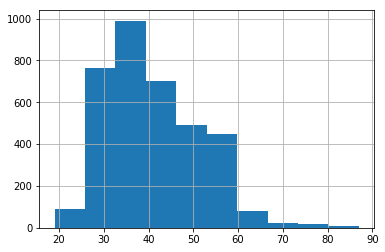

In [29]:
bank['age'].hist()

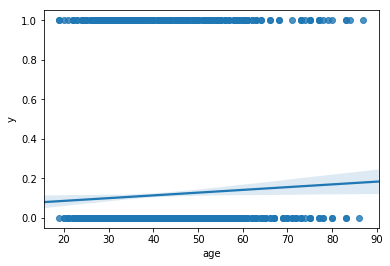

In [30]:
sns.regplot('age', 'y', data=bank)

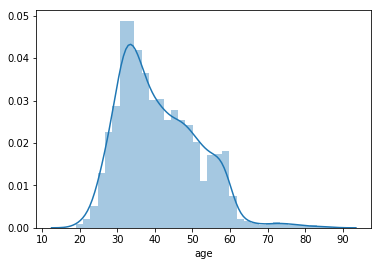

In [31]:
sns.distplot(bank['age'])

In [32]:
bank.corr()['age']

age         1.000000
default    -0.009473
balance     0.079755
housing    -0.191584
loan       -0.008377
day        -0.009974
duration    0.000054
campaign   -0.005972
pdays      -0.013394
previous   -0.017319
y           0.045566
Name: age, dtype: float64

# DURATION

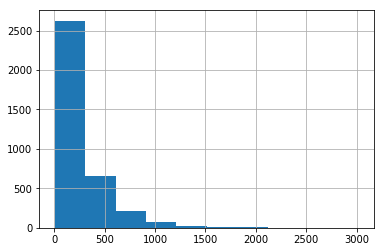

In [33]:
bank['duration'].hist()

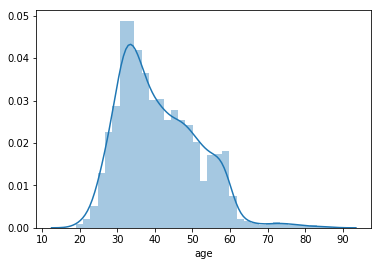

In [34]:
sns.distplot(bank['age'])

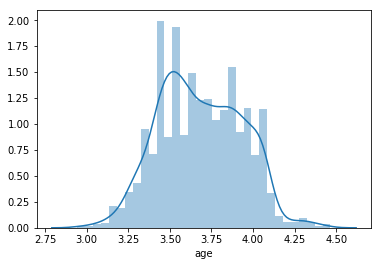

In [35]:
sns.distplot(np.log(bank['age']))

In [36]:
newage = np.log(bank['age'])
bank['newage'] = newage

In [37]:
bank.corr()['y']

age         0.045566
default     0.000271
balance     0.025249
housing    -0.110098
loan       -0.072961
day        -0.025752
duration    0.407961
campaign   -0.060484
pdays       0.103268
previous    0.113572
y           1.000000
newage      0.025937
Name: y, dtype: float64

In [38]:
bank.drop('newage', axis=1, inplace=True)

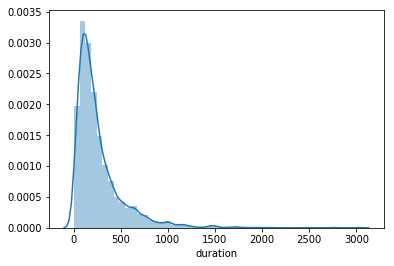

In [39]:
sns.distplot(bank['duration'])

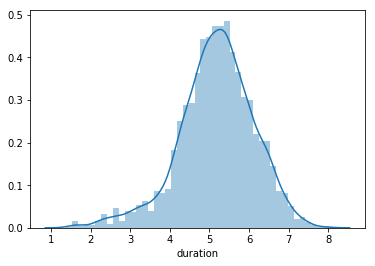

In [40]:
sns.distplot(np.log(bank['duration']))

In [41]:
newduration = np.log(bank['duration'])
bank['newduration'] = newduration

In [42]:
bank.corr()['y']

age            0.045566
default        0.000271
balance        0.025249
housing       -0.110098
loan          -0.072961
day           -0.025752
duration       0.407961
campaign      -0.060484
pdays          0.103268
previous       0.113572
y              1.000000
newduration    0.346706
Name: y, dtype: float64

In [43]:
bank.drop('newduration', axis=1, inplace=True)

# CAMPAIGN

In [44]:
bank['campaign'].describe()

count    3616.000000
mean        2.795354
std         3.144846
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        50.000000
Name: campaign, dtype: float64

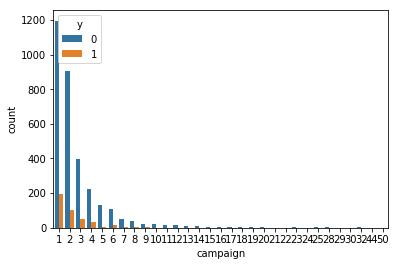

In [45]:
sns.countplot('campaign', hue='y', data=bank)

In [46]:
bank.corr()['campaign']

age        -0.005972
default    -0.009565
balance    -0.018545
housing     0.013059
loan        0.030993
day         0.159431
duration   -0.063806
campaign    1.000000
pdays      -0.097932
previous   -0.076751
y          -0.060484
Name: campaign, dtype: float64

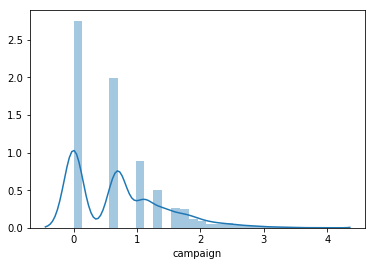

In [47]:
sns.distplot(np.log(bank['campaign']))

# DAY

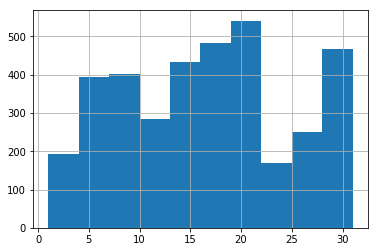

In [48]:
bank['day'].hist()

In [49]:
bank.corr()['day']

age        -0.009974
default    -0.019910
balance     0.009984
housing    -0.022393
loan       -0.005955
day         1.000000
duration   -0.026694
campaign    0.159431
pdays      -0.097074
previous   -0.061134
y          -0.025752
Name: day, dtype: float64

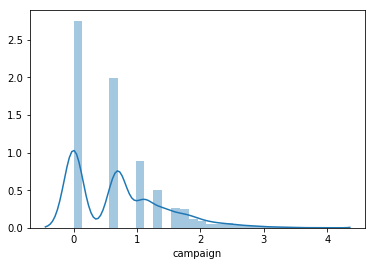

In [50]:
sns.distplot(np.log(bank['campaign']))

# PDAYs

In [51]:
bank.corr()['pdays']

age        -0.013394
default    -0.025774
balance     0.006642
housing     0.111147
loan       -0.031049
day        -0.097074
duration    0.005584
campaign   -0.097932
pdays       1.000000
previous    0.576114
y           0.103268
Name: pdays, dtype: float64

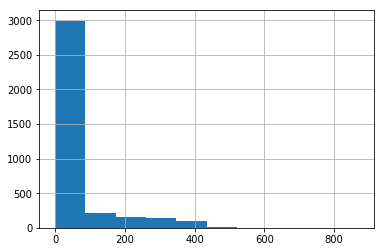

In [52]:
bank['pdays'].hist()

# PREVIOUS

In [53]:
bank.corr()['previous']

age        -0.017319
default    -0.027652
balance     0.022467
housing     0.030380
loan       -0.012078
day        -0.061134
duration    0.018808
campaign   -0.076751
pdays       0.576114
previous    1.000000
y           0.113572
Name: previous, dtype: float64

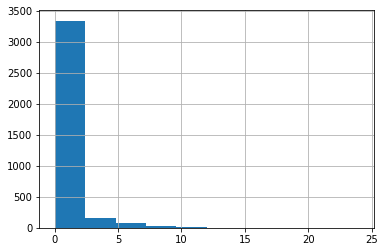

In [54]:
bank['previous'].hist()

In [55]:
pd.crosstab([bank["previous"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
previous,,,
0,2679,268,2947
1,185,42,227
2,124,43,167
3,79,18,97
4,45,18,63
5,27,11,38
6,12,7,19
7,18,3,21
8,13,2,15


## CATEGORICAL FEATURES

# JOB

In [56]:
pd.crosstab([bank["job"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
job,,,
admin.,334,48,382
blue-collar,718,55,773
entrepreneur,122,13,135
housemaid,76,10,86
management,668,106,774
retired,130,39,169
self-employed,131,15,146
services,289,32,321
student,48,17,65


In [57]:
bank['job'].value_counts()

management       774
blue-collar      773
technician       635
admin.           382
services         321
retired          169
self-employed    146
entrepreneur     135
unemployed       102
housemaid         86
student           65
unknown           28
Name: job, dtype: int64

In [61]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values='unknown', strategy='most_frequent')

In [64]:
job = impute.fit_transform(bank['job'].values.reshape(-1, 1))

In [66]:
bank['job'] = job

In [67]:
bank['job'].value_counts()

management       802
blue-collar      773
technician       635
admin.           382
services         321
retired          169
self-employed    146
entrepreneur     135
unemployed       102
housemaid         86
student           65
Name: job, dtype: int64

In [68]:
pd.crosstab([bank["job"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
job,,,
admin.,334,48,382
blue-collar,718,55,773
entrepreneur,122,13,135
housemaid,76,10,86
management,690,112,802
retired,130,39,169
self-employed,131,15,146
services,289,32,321
student,48,17,65


# MARITAL

In [58]:
pd.crosstab([bank["marital"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
marital,,,
divorced,366,64,430
married,2003,220,2223
single,830,133,963
All,3199,417,3616


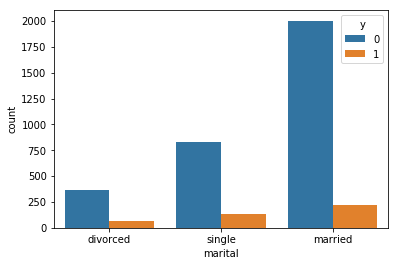

In [69]:
sns.countplot("marital", hue = "y", data = bank) #  edgecolor=sns.color_palette("dark", 3)


# EDUCATION

In [70]:
pd.crosstab([bank["education"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
education,,,
primary,498,50,548
secondary,1641,202,1843
tertiary,926,149,1075
unknown,134,16,150
All,3199,417,3616


In [71]:
bank['education'].value_counts()

secondary    1843
tertiary     1075
primary       548
unknown       150
Name: education, dtype: int64

In [72]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values='unknown', strategy='most_frequent')

In [73]:
education = impute.fit_transform(bank['education'].values.reshape(-1, 1))

In [74]:
bank['education'] = education

In [75]:
pd.crosstab([bank["education"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
education,,,
primary,498,50,548
secondary,1775,218,1993
tertiary,926,149,1075
All,3199,417,3616


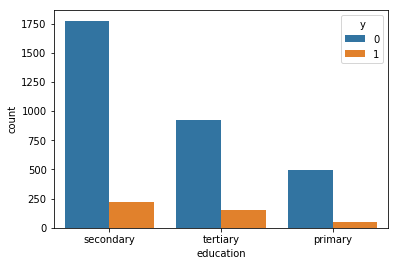

In [76]:
sns.countplot("education", hue = "y", data = bank) #  edgecolor=sns.color_palette("dark", 3)


# MONTH

In [77]:
bank['month'].value_counts()#.sort_values()

may    1100
jul     569
aug     506
jun     422
nov     335
apr     223
feb     177
jan     123
oct      65
sep      43
mar      37
dec      16
Name: month, dtype: int64

In [78]:
month = bank['month'].copy()

In [79]:
# The function below helps to categorize the month into three parts

In [80]:
new = []
for val in month:
    if val in ['jan', 'feb', 'mar', 'apr']:
        new.append('firstpart')
    elif val in ['may', 'jun', 'jul', 'aug']:
        new.append('secondpart')
    else:
        new.append('thirdpart')

In [81]:
bank['new'] = new

In [82]:
bank['newmonth'] = month

In [83]:
pd.crosstab([bank["new"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
new,,,
firstpart,464,96,560
secondpart,2364,233,2597
thirdpart,371,88,459
All,3199,417,3616


In [84]:
pd.crosstab([bank["month"]], bank["y"], 
            margins = True).style.background_gradient(cmap = "summer_r")

y,0,1,All
month,,,
apr,185,38,223
aug,442,64,506
dec,9,7,16
feb,148,29,177
jan,111,12,123
jul,517,52,569
jun,379,43,422
mar,20,17,37
may,1026,74,1100


In [85]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,new,newmonth
2236,32,admin.,divorced,secondary,1,-18,1,0,unknown,12,may,155,3,-1,0,unknown,0,secondpart,may
858,34,technician,single,tertiary,0,144,1,1,cellular,14,oct,104,1,85,19,failure,0,thirdpart,oct
3531,44,management,divorced,tertiary,0,0,0,0,cellular,22,aug,54,2,-1,0,unknown,0,secondpart,aug
2737,34,blue-collar,married,secondary,0,8309,1,1,cellular,19,nov,50,1,-1,0,unknown,0,thirdpart,nov
1257,51,blue-collar,married,primary,0,5050,0,1,unknown,16,jun,75,7,-1,0,unknown,0,secondpart,jun


In [86]:
def oneHotEncoding(data, col):
    return pd.get_dummies(data, columns=col)

In [87]:
oneHotEncoding(bank, ['newmonth', 'new']).corr()['y']

age               0.045566
default           0.000271
balance           0.025249
housing          -0.110098
loan             -0.072961
day              -0.025752
duration          0.407961
campaign         -0.060484
pdays             0.103268
previous          0.113572
y                 1.000000
newmonth_apr      0.044211
newmonth_aug      0.014095
newmonth_dec      0.067245
newmonth_feb      0.034463
newmonth_jan     -0.010434
newmonth_jul     -0.032379
newmonth_jun     -0.015278
newmonth_mar      0.109549
newmonth_may     -0.099465
newmonth_nov     -0.016820
newmonth_oct      0.172717
newmonth_sep      0.072215
new_firstpart     0.075196
new_secondpart   -0.127960
new_thirdpart     0.091205
Name: y, dtype: float64

#### This shows that 'quarterly month' relates with 'y' better than 'month'

In [88]:
bank.drop(['new', 'newmonth', 'month'], axis=1, inplace=True)

In [89]:
bank['month'] = new

In [481]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2236,32,admin.,divorced,secondary,yes,-18,yes,no,unknown,12,may,155,3,-1,0,unknown,no
858,34,technician,single,tertiary,no,144,yes,yes,cellular,14,oct,104,1,85,19,failure,no
3531,44,management,divorced,tertiary,no,0,no,no,cellular,22,aug,54,2,-1,0,unknown,no
2737,34,blue-collar,married,secondary,no,8309,yes,yes,cellular,19,nov,50,1,-1,0,unknown,no
1257,51,blue-collar,married,primary,no,5050,no,yes,unknown,16,jun,75,7,-1,0,unknown,no


In [479]:
bank['y'].value_counts()

no     3199
yes     417
Name: y, dtype: int64

# POUTCOME

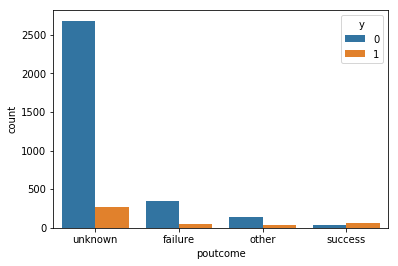

In [91]:
sns.countplot("poutcome", hue = "y", data=bank)

In [92]:
bank['poutcome'].value_counts()

unknown    2947
failure     404
other       166
success      99
Name: poutcome, dtype: int64

In [93]:
len(bank['poutcome'])

3616

In [94]:
(3705/4521)*100

81.95089581950896

In [95]:
# sergeant, advise to drop 'poutcome'

In [96]:
bank = bank.drop('poutcome', axis=1)

# CONTACT

In [218]:
bank['contact'].value_counts() #.plot.bar()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [219]:
(1324/4521)*100

29.285556292855563

In [220]:
# replace unknown and check 

# BALANCE

In [100]:
bank.corr()['balance']

age         0.079755
default    -0.081091
balance     1.000000
housing    -0.050744
loan       -0.071942
day         0.009984
duration   -0.016796
campaign   -0.018545
pdays       0.006642
previous    0.022467
y           0.025249
Name: balance, dtype: float64

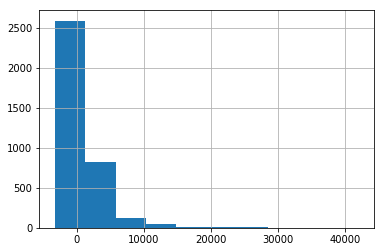

In [102]:
bank['balance'].hist()

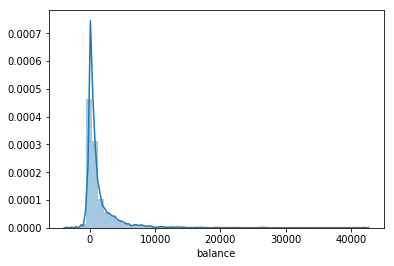

In [103]:
sns.distplot(bank['balance'])

In [108]:
pd.notnull(bank['balance']).any()

True

In [ ]:
sns.distplot(np.log(bank['balance']))

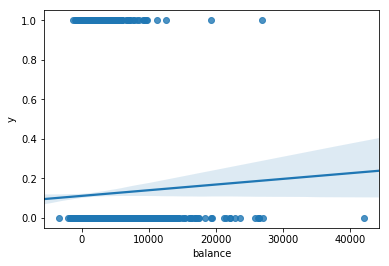

In [109]:
sns.regplot('balance', 'y', data=bank)

# CREATING PIPELINE

In [388]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import Imputer

##### gets a dataframe with the selected attributes

In [389]:

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]


#### returns a dataframe

In [390]:
class ReturnDataframe(BaseEstimator, TransformerMixin):
    def __init__(self, attrib):
        self.attributes = attrib
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return pd.DataFrame(X, columns=self.attributes)

#### gets the one hot encoding of the dataframe and returns the np.array

In [391]:
class OneHotEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return pd.get_dummies(X)

#### drop the attributes from dataframe

In [392]:

class DropDataframeColumn(BaseEstimator, TransformerMixin):
    def __init__(self, attrib):
        self.attributes = attrib
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(self.attributes, axis=1)

##### This works like change function which converts 'yes or no' to '1 or 0'

In [417]:

class ChangeFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, attrib):
        self.attributes = attrib
    def fit(self, X, y=None):
        return self
    
    # Try to reduce the order of growth
    def transform(self, X):
        total = []
        i = 0
        for value in X.loc[:, self.attributes]:
            new = []
            for val in bank1[value]:
                if val == 'yes':
                    new.append(1)
                elif val == 'no':
                    new.append(0)
                else:
                    break
            total.append(new)
            if [] not in total:
                X[self.attributes[i]] = total[i]
            i += 1
        return X

In [670]:

class MonthColumn(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        new = []
        if 'month' not in X:
            return X
        else:
            for val in X['month']:
                if val in ['jan', 'feb', 'mar', 'apr']:
                    new.append('firstpart')
                elif val in ['may', 'jun', 'jul', 'aug']:
                    new.append('secondpart')
                else:
                    new.append('thirdpart')
            X['month'] = new
        return X

In [671]:
bank1 = train.copy()

In [672]:
a = MonthColumn().fit_transform(bank1)

In [673]:
a.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2236,32,admin.,divorced,secondary,yes,-18,yes,no,unknown,12,secondpart,155,3,-1,0,unknown,no
858,34,technician,single,tertiary,no,144,yes,yes,cellular,14,thirdpart,104,1,85,19,failure,no
3531,44,management,divorced,tertiary,no,0,no,no,cellular,22,secondpart,54,2,-1,0,unknown,no
2737,34,blue-collar,married,secondary,no,8309,yes,yes,cellular,19,thirdpart,50,1,-1,0,unknown,no
1257,51,blue-collar,married,primary,no,5050,no,yes,unknown,16,secondpart,75,7,-1,0,unknown,no


In [674]:
b = DataFrameSelector(cat_attrib).fit_transform(a)

In [675]:
b.head()

,job,marital,education,contact,month
2236,admin.,divorced,secondary,unknown,secondpart
858,technician,single,tertiary,cellular,thirdpart
3531,management,divorced,tertiary,cellular,secondpart
2737,blue-collar,married,secondary,cellular,thirdpart
1257,blue-collar,married,primary,unknown,secondpart


In [676]:
c = SimpleImputer(missing_values='unknown', strategy='most_frequent').fit_transform(b)

In [677]:
c

array([['admin.', 'divorced', 'secondary', 'cellular', 'secondpart'],
       ['technician', 'single', 'tertiary', 'cellular', 'thirdpart'],
       ['management', 'divorced', 'tertiary', 'cellular', 'secondpart'],
       ...,
       ['technician', 'married', 'secondary', 'cellular', 'secondpart'],
       ['services', 'single', 'secondary', 'cellular', 'secondpart'],
       ['blue-collar', 'married', 'secondary', 'cellular', 'thirdpart']],
      dtype=object)

In [678]:
d = ReturnDataframe(cat_attrib).fit_transform(c)

In [679]:
d.head()

,job,marital,education,contact,month
0,admin.,divorced,secondary,cellular,secondpart
1,technician,single,tertiary,cellular,thirdpart
2,management,divorced,tertiary,cellular,secondpart
3,blue-collar,married,secondary,cellular,thirdpart
4,blue-collar,married,primary,cellular,secondpart


In [680]:
e = OneHotEncoder().fit_transform(d)

In [681]:
e.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,month_firstpart,month_secondpart,month_thirdpart
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0


In [682]:
e.shape

(3616, 22)

In [683]:
f = DropDataframeColumn(drop_attrib).fit_transform(e)

In [684]:
f.head()

,job_admin.,job_blue-collar,job_management,job_services,job_technician,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,month_firstpart,month_secondpart,month_thirdpart
0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0
3,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1
4,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0


In [685]:
f.shape

(3616, 16)

In [686]:
g = MonthColumn().fit_transform(f)

In [687]:
g.head()

,job_admin.,job_blue-collar,job_management,job_services,job_technician,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,month_firstpart,month_secondpart,month_thirdpart
0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0
3,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1
4,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0


In [689]:
g.shape

(3616, 16)

In [ ]:
h = DataFrameSelector(cat_attrib).fit_transform(g)

In [ ]:
h.head()

### Choose the attributes

In [623]:
newbank = train.copy()

In [624]:
# X = newbank.drop('y', axis=1)
# y = newbank['y']

In [625]:
num_attrib = ['campaign', 'pdays', 'age', 'duration', 'day', 'balance', 'loan']

In [626]:
cat_attrib = ['job', 'marital', 'education', 'contact', 'month']

In [627]:
drop_attrib = ['job_entrepreneur', 'job_housemaid', 'job_student', 'job_unemployed', 'job_self-employed', 'job_retired'] 

In [628]:
tochange = ['loan']

In [629]:
num_pipeline = Pipeline([
 ('selector', DataFrameSelector(num_attrib)),
 ('feature_change', ChangeFeatures(tochange)),
 ('imputer', SimpleImputer(strategy="median")),
 ('new_selector', ReturnDataframe(num_attrib))
#  ('std_scaler', StandardScaler()),
 ])


In [630]:
cat_pipeline = Pipeline([
 ('month', MonthColumn()),
 ('selector', DataFrameSelector(cat_attrib)),
 ('imputer', SimpleImputer(missing_values='unknown', strategy='most_frequent')),
 ('new_selector', ReturnDataframe(cat_attrib)),
 ('cat_encoder', OneHotEncoder()),
 ('drop_selector', DropDataframeColumn(drop_attrib))
])

In [631]:
output_pipeline = Pipeline([
 ('change', ChangeFeatures(['y'])),
 ('selector', DataFrameSelector(['y']))
])

In [632]:
full_pipeline = FeatureUnion(transformer_list=[
 ("num_pipeline", num_pipeline),
 ("cat_pipeline", cat_pipeline),
 ])

In [611]:
num_pipeline.fit_transform(newbank).columns

C:\Users\Iyanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Index(['campaign', 'pdays', 'age', 'duration', 'day', 'balance', 'loan'], dtype='object')

In [612]:
# run once
cat_pipeline.fit_transform(newbank).columns

Index(['job_admin.', 'job_blue-collar', 'job_management', 'job_services',
       'job_technician', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'contact_cellular', 'contact_telephone',
       'month_firstpart', 'month_secondpart', 'month_thirdpart'],
      dtype='object')

In [633]:
col_name = ['campaign', 'pdays', 'age', 'duration', 'day', 'balance', 'loan'] + ['job_admin.', 'job_blue-collar', 'job_management', 'job_services',
       'job_technician', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'contact_cellular', 'contact_telephone',
       'month_firstpart', 'month_secondpart', 'month_thirdpart']
   

In [634]:
len(col_name)

23

In [635]:
X = full_pipeline.fit_transform(newbank)

C:\Users\Iyanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [636]:
y = output_pipeline.fit_transform(newbank)

In [637]:
X.shape

(3616, 23)

In [638]:
y.shape

(3616, 1)

In [639]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [640]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [641]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [642]:
dtc.fit(X, y)
rfc.fit(X, y)

C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Iyanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [643]:
len(X)

3616

In [644]:
a = X[3600:]
b = y[3600:]

In [645]:
print("DTC Predictions:", dtc.predict(a))

DTC Predictions: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [646]:
print("Labels:", b)

Labels:       y
1439  0
294   0
2573  0
323   1
2183  0
3833  0
3084  0
360   0
2023  0
2412  0
4520  0
4327  0
1205  0
4095  0
4335  0
1165  0


In [647]:
print("RFC Predictions:", rfc.predict(a))

RFC Predictions: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [648]:
print("Labels:", b)

Labels:       y
1439  0
294   0
2573  0
323   1
2183  0
3833  0
3084  0
360   0
2023  0
2412  0
4520  0
4327  0
1205  0
4095  0
4335  0
1165  0


In [649]:
pred_dtc = dtc.predict(X)
pred_rfc = rfc.predict(X)


In [650]:
print(accuracy_score(y, pred_dtc))
print(accuracy_score(y, pred_dtc))

1.0
1.0


In [651]:
# it h as probably crammed the test data because the model is complex?

# VALIDATION

In [652]:
score_forest = cross_val_score(rfc, X, y, cv=3, scoring="accuracy")

C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [653]:
print(score_forest)
print('RFC MEAN: ', score_forest.mean())

[0.88474295 0.8813278  0.89792531]
RFC MEAN:  0.8879986879801086


In [654]:
score_tree = cross_val_score(dtc, X, y, cv=3, scoring="accuracy")

In [655]:
print(score_tree)
print('DTC MEAN: ', score_tree.mean())

[0.85240464 0.87551867 0.8406639 ]
DTC MEAN:  0.8561957386878425


In [656]:
y_pred_forest = cross_val_predict(rfc, X, y, cv=3)

C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [657]:
y_pred_forest

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [658]:
y_pred_tree = cross_val_predict(dtc, X, y, cv=3)

In [659]:
y_pred_tree

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [660]:
def my_model(ytrue, ypred):
    print(confusion_matrix(ytrue, ypred))
    print('precision: ', precision_score(ytrue, ypred))
    print("recall:", recall_score(ytrue, ypred))
    print("f1 score:", f1_score(ytrue, ypred))

In [661]:
my_model(y, y_pred_forest)

[[3138   61]
 [ 354   63]]
precision:  0.5080645161290323
recall: 0.1510791366906475
f1 score: 0.23290203327171907


In [662]:
my_model(y, y_pred_tree)

[[2935  264]
 [ 259  158]]
precision:  0.3744075829383886
recall: 0.37889688249400477
f1 score: 0.3766388557806913


In [663]:
sorted(zip(col_name, dtc.feature_importances_), reverse=True)

[('pdays', 0.12714712596768624),
 ('month_thirdpart', 0.008303510422689009),
 ('month_secondpart', 0.019457185702609785),
 ('month_firstpart', 0.007718302415043004),
 ('marital_single', 0.013786374524983708),
 ('marital_married', 0.006544891953776479),
 ('marital_divorced', 0.009091071185464537),
 ('loan', 0.018557802199722678),
 ('job_technician', 0.012589286760962744),
 ('job_services', 0.006949367611984771),
 ('job_management', 0.007001439528273791),
 ('job_blue-collar', 0.013515063270270047),
 ('job_admin.', 0.007263565841819653),
 ('education_tertiary', 0.01631615864300989),
 ('education_secondary', 0.005963494287408463),
 ('education_primary', 0.0013553396107746504),
 ('duration', 0.29112197255396083),
 ('day', 0.11814937932988351),
 ('contact_telephone', 0.0020330094161619757),
 ('contact_cellular', 0.005916194773365334),
 ('campaign', 0.04176686810234325),
 ('balance', 0.1478297082729619),
 ('age', 0.11162288762484388)]

In [664]:
sorted(zip(col_name, rfc.feature_importances_), reverse=True)

[('pdays', 0.08319913844900434),
 ('month_thirdpart', 0.014171288136135335),
 ('month_secondpart', 0.013048163863982032),
 ('month_firstpart', 0.00777787456234426),
 ('marital_single', 0.009545123021347472),
 ('marital_married', 0.015342182508709532),
 ('marital_divorced', 0.012795748069009728),
 ('loan', 0.01077456599321738),
 ('job_technician', 0.013595988320398869),
 ('job_services', 0.009353547955261273),
 ('job_management', 0.01627927368447863),
 ('job_blue-collar', 0.01366469533167275),
 ('job_admin.', 0.009984096473651912),
 ('education_tertiary', 0.01238310044019052),
 ('education_secondary', 0.014863344181550489),
 ('education_primary', 0.01049738961149298),
 ('duration', 0.31019782147566477),
 ('day', 0.1159573499104641),
 ('contact_telephone', 0.00971323930241195),
 ('contact_cellular', 0.007775006683455021),
 ('campaign', 0.050256036382153334),
 ('balance', 0.12139135403435213),
 ('age', 0.11743367160905116)]

In [693]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [694]:
knn = KNeighborsClassifier(n_neighbors=3)
log_reg = LogisticRegression()

In [695]:
y_pred_reg = cross_val_predict(log_reg, X, y, cv=3)
y_pred_knn = cross_val_predict(knn, X, y, cv=3)

C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\linear_

In [696]:
my_model(y, y_pred_reg)

[[3139   60]
 [ 338   79]]
precision:  0.5683453237410072
recall: 0.18944844124700239
f1 score: 0.2841726618705036


In [697]:
my_model(y, y_pred_knn)

[[3046  153]
 [ 337   80]]
precision:  0.34334763948497854
recall: 0.19184652278177458
f1 score: 0.24615384615384617


# PRECISION/RECALL CURVE

In [698]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

### for random forest

In [699]:
y_pred_forest = cross_val_predict(rfc, X, y, cv=3, method='predict_proba')

C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [719]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])

In [720]:
y_scores_forest = y_pred_forest[:, 1]

In [721]:
precisions, recalls, thresholds = precision_recall_curve(y, y_scores_forest)

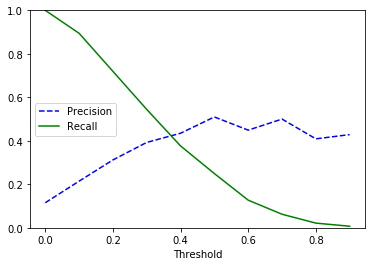

In [722]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

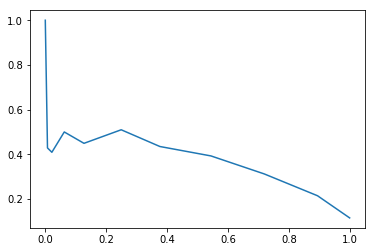

In [723]:
plt.plot(recalls, precisions)

In [751]:
y_pred_90 = (y_scores_forest > 0.3) #or 0.2

In [752]:
precision_score(y, y_pred_90)

0.43490304709141275

In [753]:
recall_score(y, y_pred_90)

0.3764988009592326

### for decision tree

In [724]:
y_pred_tree = cross_val_predict(dtc, X, y, cv=3, method='predict_proba')

C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [725]:
y_scores_tree = y_pred_tree[:, 1]

In [726]:
precisions, recalls, thresholds = precision_recall_curve(y, y_scores_tree)

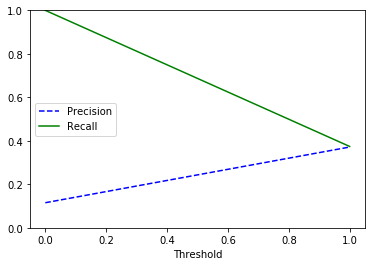

In [727]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

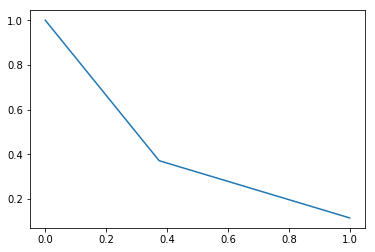

In [728]:
plt.plot(recalls, precisions)

In [772]:
y_pred_90 = (y_scores_tree > 0.3) #consstant for all values

In [773]:
precision_score(y, y_pred_90)

0.37142857142857144

In [774]:
recall_score(y, y_pred_90)

0.37410071942446044

# ROC CURVE

### for random forest

In [ ]:
# y_probas_forest = cross_val_predict(rfc, X, y_5, cv=3,
#  method="predict_proba")

In [ ]:
# y_scores_forest = y_pred_forest[:, 1] 

In [729]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y,y_scores_forest)


### for decision tree 

In [ ]:
# y_probas_tree = cross_val_predict(dtc, X, y_5, cv=3,
#  method="predict_proba")

In [ ]:
# y_scores_tree = y_probas_tree[:, 1] 

In [730]:
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y,y_scores_tree)


In [731]:
def plot_roc_curve(fpr, tpr, label=None):
     plt.plot(fpr, tpr, linewidth=2, label=label)
     plt.plot([0, 1], [0, 1], 'k--')
     plt.axis([0, 1, 0, 1])
     plt.xlabel('False Positive Rate')
     plt.ylabel('True Positive Rate')


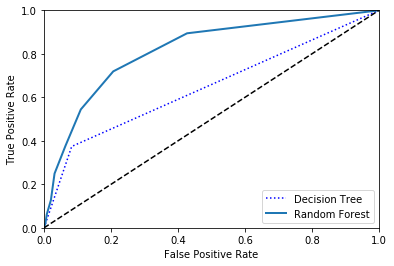

In [732]:
plt.plot(fpr_tree, tpr_tree, "b:", label="Decision Tree")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")

In [733]:
roc_auc_score(y, y_scores_tree)

0.6457874650576506

In [734]:
roc_auc_score(y, y_scores_forest)

0.8165951140306886